In [1]:
# imports 
import pims
import numpy as np 
import PIL
import pandas as pd
import skimage
from skimage import measure 
import background_subtraction as bs 
import time 
from scipy import ndimage 

In [ ]:
#run these if you want to reload imported modules every time the code is run 
%load_ext autoreload
%autoreload 2

In [3]:
### Run analysis on the video sequence. All you need to modify for different datasets is all of these pathes. 
# load videos, convert to numpy, then crop 
L = bs.crop(bs.arr(pims.ImageSequence('../../left-rect/left-*.tiff')))
R = bs.crop(bs.arr(pims.ImageSequence('../../right-rect/right-*.tiff')))

In [ ]:
# generate left foreground video
bs.gen_foregrounds(L,'../../left-fg','leftfg')

In [ ]:
# generate right foreground video 
bs.gen_foregrounds(R,'../../right-fg','rightfg')

In [ ]:
# load foreground videos 
Lf = bs.arr(pims.ImageSequence('../../left-fg/leftfg-*.tiff'))
Rf = bs.arr(pims.ImageSequence('../../right-fg/rightfg-*.tiff'))

In [ ]:
# locate features in left video 
bs.locate_features(Lf, '../leftfeatures.h5')

In [ ]:
# locate features in right video 
bs.locate_features(Rf, '../rightfeatures.h5')

In [ ]:
import visualization as vs

In [5]:
tL = pd.read_hdf('/media/kpierce/Data/steadyspt4.1-rectified/analysis/trajectories/leftfeatures.h5')
tR = pd.read_hdf('/media/kpierce/Data/steadyspt4.1-rectified/analysis/trajectories/rightfeatures.h5')

# increase y coordinate of every feature by 245 to undo the cropping effect
tL['y']+=245
tR['y']+=245

In [6]:
il = 5000
ir = int(round(5000*188/190.4))

In [15]:
iml = L[il]
imr = R[ir]
iml = (255*np.stack((iml,)*3,-1)).astype('uint8')
imr = (255*np.stack((imr,)*3,-1)).astype('uint8')

In [38]:
L = bs.arr(pims.ImageSequence('../../left-rect/left-*.tiff'))
R = bs.arr(pims.ImageSequence('../../right-rect/right-*.tiff'))
iml = L[il]
imr = R[ir]
iml = (255*np.stack((iml,)*3,-1)).astype('uint8')
imr = (255*np.stack((imr,)*3,-1)).astype('uint8')

In [39]:
lfeats = tL[tL['frame']==il]
rfeats = tR[tR['frame']==ir]

In [40]:
import skimage

In [41]:
from skimage import draw

In [51]:
for i,f in lfeats.iterrows():
    x = int(round(f['x']))
    y = int(round(f['y']))
    r,c = skimage.draw.circle_perimeter(y,x,15,shape=iml.shape)
    iml[r,c]=[250,0,250]
    
for i,f in rfeats.iterrows():
    x = int(round(f['x']))
    y = int(round(f['y']))
    r,c = skimage.draw.circle_perimeter(y,x,15,shape=iml.shape)
    imr[r,c]=[250,0,250]

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
im = np.hstack((iml,imr))

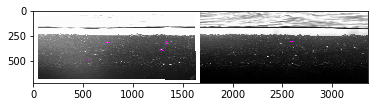

In [54]:
plt.imshow(im)

In [55]:
from skimage import io

In [56]:
io.imsave('/home/kpierce/Desktop/stereo-pres/detected.png',im)